In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.02G/1.06G [00:07<00:00, 152MB/s]
100% 1.06G/1.06G [00:07<00:00, 148MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape=(130,130,3)
)

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(130,130)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(130,130)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image=tensorflow.cast(image/255. , tensorflow.float64)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
conv_base.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data = test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 105ms/step - accuracy: 0.9094 - loss: 0.2166 - val_accuracy: 0.9052 - val_loss: 0.2292
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9252 - loss: 0.1818 - val_accuracy: 0.9016 - val_loss: 0.2285
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9343 - loss: 0.1572 - val_accuracy: 0.9068 - val_loss: 0.2272
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 105ms/step - accuracy: 0.9449 - loss: 0.1376 - val_accuracy: 0.9048 - val_loss: 0.2342
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.9556 - loss: 0.1106 - val_accuracy: 0.9060 - val_loss: 0.2459
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.9626 - loss: 0.0942 - val_accuracy: 0.8930 - val_loss: 0.2904
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 105ms/step - accuracy: 0.9725 - loss: 0.0763 - val_accuracy: 0.9004 - val_loss: 0.3049
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9792 - loss: 0.057

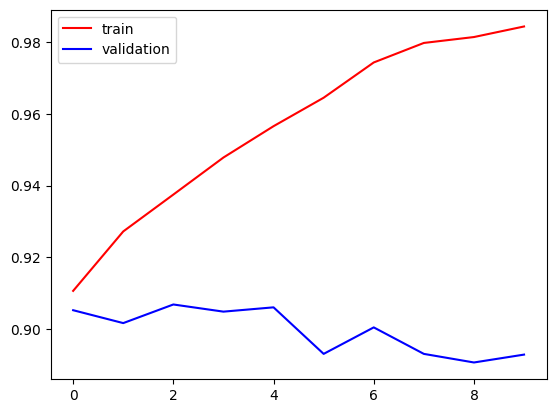

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

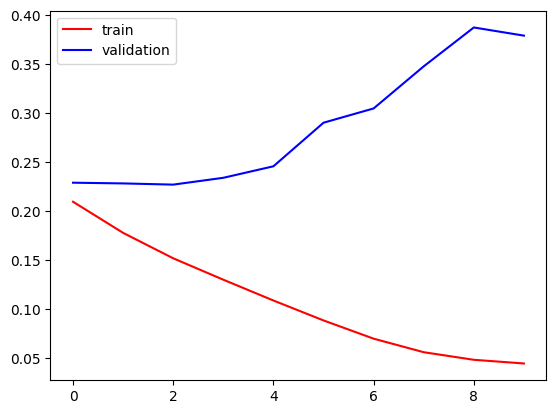

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# Massive Overfittting